In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

# Read the Data

In [59]:
dataset=pd.read_csv('C:/UNHCR/ML/Case Study - TCS/train.csv')


In [60]:
dataset.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


# Analyze the Data

In [61]:
dataset.shape

(43957, 15)

In [62]:
#Listing the columns of the Dataset
print (list(dataset.columns))

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income_>50K']


In [63]:
dataset.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [64]:
dataset['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [65]:
dataset=dataset.drop(['occupation','workclass'],axis=1)

In [66]:
dataset.head(5)

,age,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,366425,Doctorate,16,Divorced,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,244602,12th,8,Never-married,Own-child,White,Male,0,0,15,United-States,0
2,31,174201,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,40,United-States,1
3,58,110199,7th-8th,4,Married-civ-spouse,Husband,White,Male,0,0,40,United-States,0
4,25,149248,Some-college,10,Never-married,Not-in-family,Black,Male,0,0,40,United-States,0


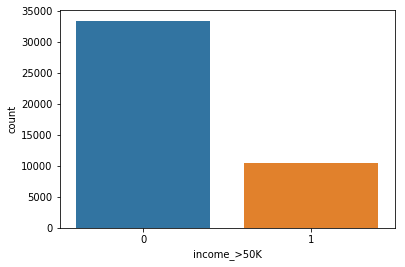

In [42]:
sns.countplot(x='income_>50K',data=dataset)

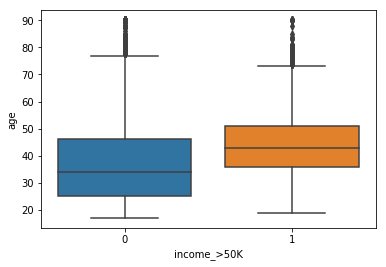

In [44]:
sns.boxplot(y='age',x='income_>50K',data=dataset)

In [67]:
data_gender=pd.get_dummies(dataset['gender'],drop_first=True)

In [68]:
data_race=pd.get_dummies(dataset['race'],drop_first=True)

In [69]:
dataset=dataset.drop(['education','marital-status','relationship','native-country'],axis=1)

In [70]:
dataset.head(5)

,age,fnlwgt,educational-num,race,gender,capital-gain,capital-loss,hours-per-week,income_>50K
0,67,366425,16,White,Male,99999,0,60,1
1,17,244602,8,White,Male,0,0,15,0
2,31,174201,13,White,Male,0,0,40,1
3,58,110199,4,White,Male,0,0,40,0
4,25,149248,10,Black,Male,0,0,40,0


In [71]:
dataset=pd.concat([dataset,data_gender,data_race],axis=1)

In [72]:
dataset.head(5)

,age,fnlwgt,educational-num,race,gender,capital-gain,capital-loss,hours-per-week,income_>50K,Male,Asian-Pac-Islander,Black,Other,White
0,67,366425,16,White,Male,99999,0,60,1,1,0,0,0,1
1,17,244602,8,White,Male,0,0,15,0,1,0,0,0,1
2,31,174201,13,White,Male,0,0,40,1,1,0,0,0,1
3,58,110199,4,White,Male,0,0,40,0,1,0,0,0,1
4,25,149248,10,Black,Male,0,0,40,0,1,0,1,0,0


In [73]:
dataset=dataset.drop(['race','gender'],axis=1)

In [74]:
dataset.head(5)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,Male,Asian-Pac-Islander,Black,Other,White
0,67,366425,16,99999,0,60,1,1,0,0,0,1
1,17,244602,8,0,0,15,0,1,0,0,0,1
2,31,174201,13,0,0,40,1,1,0,0,0,1
3,58,110199,4,0,0,40,0,1,0,0,0,1
4,25,149248,10,0,0,40,0,1,0,1,0,0


# logistic regression

In [76]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [77]:
X=dataset.drop('income_>50K',axis=1)
y=dataset['income_>50K']

In [78]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
log_reg=LogisticRegression()

In [83]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
log_pred=log_reg.predict(X_test)

In [85]:
cm=confusion_matrix(y_test,log_pred)

In [86]:
cm

array([[10715,   339],
       [ 2625,   827]], dtype=int64)

In [87]:
acc=accuracy_score(y_test,log_pred)

In [88]:
acc

0.7956707569281677